# Project 5: Build Functions & Visualize Distribution
Statistical Function, Chapter 3

## Build Functions

In [4]:
def total(list_obj):
    total = 0
    n = len(list_obj)
    for i in range(n):
        total += list_obj[i]
    return total

def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    return mean_

def median(list_obj):
    n = len(list_obj)
    list_obj = sorted(list_obj)
    if n % 2 != 0:
        #list length is odd
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        # pass slice with two middle values to mean()
        median_ = mean(list_obj[lower_middle_index : upper_middle_index + 1])
        
    return median_

def mode(list_obj):
    max_count = 0
    counter_dict = {}
    for value in list_obj:
        counter_dict[value] = 0
    for value in list_obj:
        counter_dict[value] += 1
    count_list = list(counter_dict.values())
    max_count = max(count_list)
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    
    return mode_

def variance(list_obj, sample = False):
    list_mean = mean(list_obj)
    n = len(list_obj)
    sum_sq_diff = 0
    for val in list_obj:
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        variance_ = sum_sq_diff / n
    else:
        variance_ = sum_sq_diff / (n - 1)
    
    return variance_

def SD(list_obj, sample = False):
    SD_ = variance(list_obj, sample) ** (1/2)
    
    return SD_

def covariance(list_obj1, list_obj2, sample = False):
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    if n1 == n2:
        n = n1
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
        else:
            cov = cov / (n - 1)
        return cov
    else:
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)
    
def correlation(list_obj1, list_obj2):
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    return corr

def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    for val in list_obj:
        skew += (val - mean_) ** 3
    skew = skew / (n * SD_ **3) if not sample else n * skew / ((n - 1)*(n - 2) * SD_ ** 3)
        
    return skew

def kurtosis(list_obj, sample = False):
    mean_ = mean(list_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for val in list_obj:
        kurt += (val - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if sample == False else  n * (n + 1) * kurt / \
    ( (n - 1) * (n - 2) *(n - 3) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt

In [5]:
lst = [1,2,3,4,2]
print(lst)
lst2 = [2,3,4,5,3]
print(lst2)

[1, 2, 3, 4, 2]
[2, 3, 4, 5, 3]


In [6]:
print("List Total:", total(lst))
print("List Mean:",mean(lst))
print("List Media:",median(lst))
print("List Mode:",mode(lst))
print("List Variance:",variance(lst))
print("List St. Dev.:",SD(lst))
print("Lists Covariance:",covariance(lst, lst2))
print("Lists Correlation:",correlation(lst, lst2))
print("List Skewness:",skewness(lst))
print("List Total:", kurtosis(lst))

List Total: 12
List Mean: 2.4
List Media: 2
List Mode: [2]
List Variance: 1.04
List St. Dev.: 1.019803902718557
Lists Covariance: 1.04
Lists Correlation: 1.0
List Skewness: 0.27154541788363973
List Total: 1.9556213017751476


### Create a Function that generates a datastructure with statistics for each column of data

In [7]:
def gather_statistics(df, sample = False):
    #create a dict of dict with an entry for ea. column of data
    dct = {key: {} for key in df}
    #call each column of data & key
    #df.items() makes a list of tuples
    #    tuple index 0 refers to key
    #    index 1 referes to obj pointed to by key
    for key, val in df.items():
        val.dropna(axis = 0, inplace = True) #true alters the obj. itself
        #call each function that takes one parameter
        dct[key]["mean"] = round(mean(val), 3)
        dct[key]["median"] = round(median(val), 3)
        dct[key]["variance"] = round(variance(val), 3)
        dct[key]["SD"] = round(SD(val), 3)
        dct[key]["skewness"] = round(skewness(val), 3)
        dct[key]["kurtosis"] = round(kurtosis(val), 3)
    
    #Pandas data frame
    import pandas as pd
    stats_df = pd.DataFrame(dct)
    return stats_df

In [8]:
!pip install pandas-datareader

## Stock Data

In [9]:
import pandas_datareader.data as web
import datetime

In [10]:
#Understanding Datetime
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.today()

print(start, end)

2012-01-01 00:00:00 2021-10-05 10:10:26.758333


In [11]:
data_dct = {}
stocks = {"MSFT", "AAPL", "FB", "TSLA"}
for stock in stocks:
    data_dct[stock] = web.DataReader(stock, 'yahoo', start, end)

In [12]:
data_dct[stock]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,21.707485
2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.218349
2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,22.445400
2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,22.794077
2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,22.494053
...,...,...,...,...,...,...
2021-09-29,286.769989,283.010010,285.100006,284.000000,26353700.0,284.000000
2021-09-30,287.829987,281.619995,285.709991,281.920013,32325800.0,281.920013
2021-10-01,289.980011,281.290009,282.119995,289.100006,30086300.0,289.100006


In [13]:
data_dct.values()

dict_values([                  High         Low        Open       Close       Volume  \
Date                                                                      
2012-01-03   14.732143   14.607143   14.621429   14.686786  302220800.0   
2012-01-04   14.810000   14.617143   14.642857   14.765714  260022000.0   
2012-01-05   14.948214   14.738214   14.819643   14.929643  271269600.0   
2012-01-06   15.098214   14.972143   14.991786   15.085714  318292800.0   
2012-01-09   15.276786   15.048214   15.196429   15.061786  394024400.0   
...                ...         ...         ...         ...          ...   
2021-09-29  144.449997  142.029999  142.470001  142.830002   74602000.0   
2021-09-30  144.380005  141.279999  143.660004  141.500000   88934200.0   
2021-10-01  142.919998  139.110001  141.899994  142.649994   94639600.0   
2021-10-04  142.210007  138.270004  141.759995  139.139999   98180300.0   
2021-10-05  141.039993  139.360001  139.490005  140.999893   26907542.0   

           

In [14]:
for df in data_dct.values():
    print(df["Close"])

Date
2012-01-03     14.686786
2012-01-04     14.765714
2012-01-05     14.929643
2012-01-06     15.085714
2012-01-09     15.061786
                 ...    
2021-09-29    142.830002
2021-09-30    141.500000
2021-10-01    142.649994
2021-10-04    139.139999
2021-10-05    140.999893
Name: Close, Length: 2456, dtype: float64
Date
2012-05-18     38.230000
2012-05-21     34.029999
2012-05-22     31.000000
2012-05-23     32.000000
2012-05-24     33.029999
                 ...    
2021-09-29    339.609985
2021-09-30    339.390015
2021-10-01    343.010010
2021-10-04    326.230011
2021-10-05    333.029907
Name: Close, Length: 2361, dtype: float64
Date
2012-01-03      5.616000
2012-01-04      5.542000
2012-01-05      5.424000
2012-01-06      5.382000
2012-01-09      5.450000
                 ...    
2021-09-29    781.309998
2021-09-30    775.479980
2021-10-01    775.219971
2021-10-04    781.530029
2021-10-05    786.070129
Name: Close, Length: 2456, dtype: float64
Date
2012-01-03     26.770000
2012

In [15]:
import pandas as pd
close_data = pd.concat((df["Close"] for df in data_dct.values()), 
                       keys = data_dct.keys(), 
                       axis = 1) #concatenate horizontally
close_data

,AAPL,FB,TSLA,MSFT
Date,,,,
2012-01-03,14.686786,NaN,5.616000,26.770000
2012-01-04,14.765714,NaN,5.542000,27.400000
2012-01-05,14.929643,NaN,5.424000,27.680000
2012-01-06,15.085714,NaN,5.382000,28.110001
2012-01-09,15.061786,NaN,5.450000,27.740000
...,...,...,...,...
2021-09-29,142.830002,339.609985,781.309998,284.000000
2021-09-30,141.500000,339.390015,775.479980,281.920013
2021-10-01,142.649994,343.010010,775.219971,289.100006


In [16]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Close \n Daily Stock Prices')

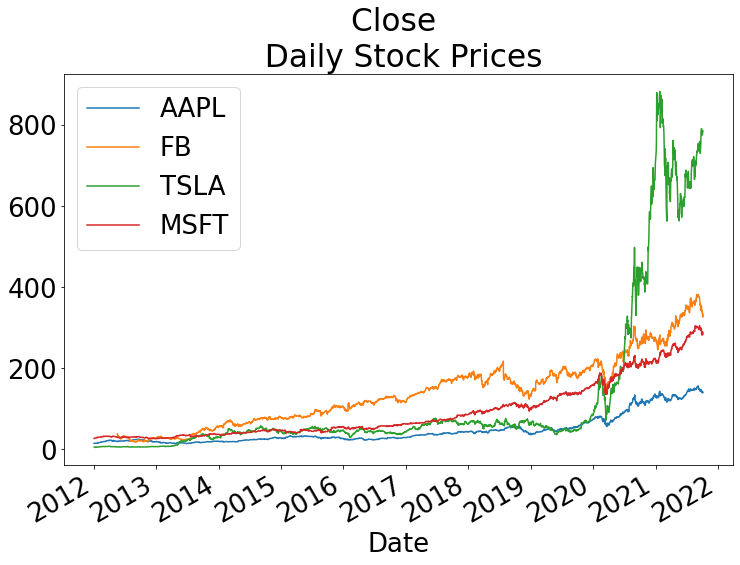

In [17]:
plt.rcParams.update({"font.size": 26})
fig, ax = plt.subplots(figsize = (12, 8))
close_data.plot.line(ax = ax, legend = True)
#Title
plt.title("Close \n Daily Stock Prices")

It is helpful to log the y-axis to view change in terms of proportion
Normalizes it

<ipython-input-18-3492630b5ece>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y)


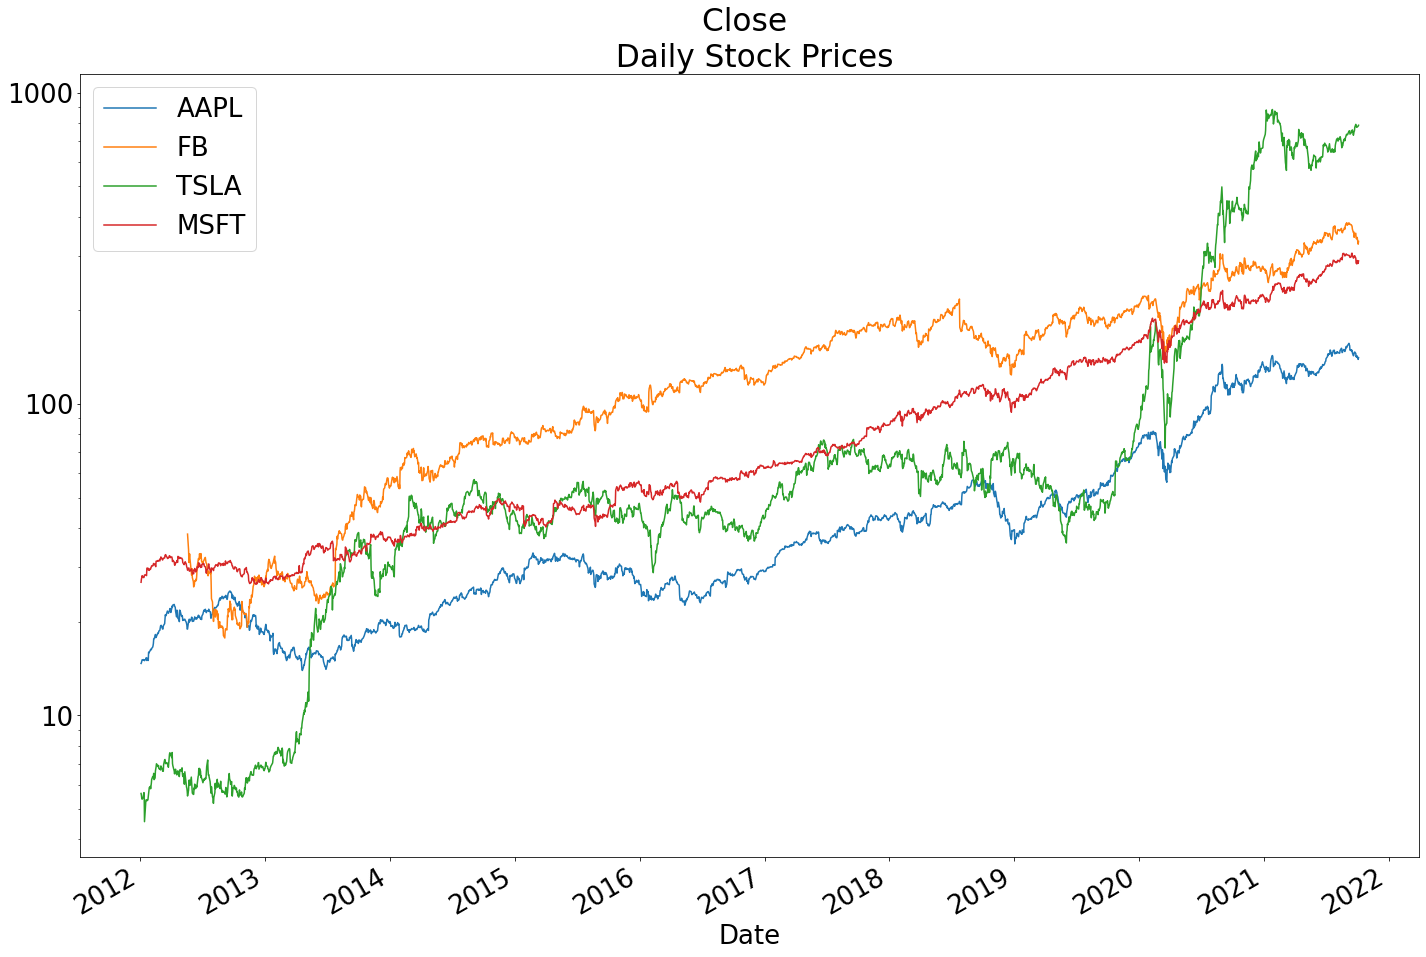

In [18]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (24, 16))
close_data.plot.line(ax = ax, legend = True)
#Title
plt.title("Close \n Daily Stock Prices")
#Normalize distribution
ax.set_yscale("log")
#Y axis values
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y)
                    if y >= 1 
                   else round(y,1) for y in y_vals] )
#Remove margins
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0.01

plt.show()
plt.close()


### Transform Data

In [19]:
import numpy as np

In [20]:
price_change_data = close_data.pct_change()
price_change_data

,AAPL,FB,TSLA,MSFT
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,NaN,-0.013177,0.023534
2012-01-05,0.011102,NaN,-0.021292,0.010219
2012-01-06,0.010454,NaN,-0.007743,0.015535
2012-01-09,-0.001586,NaN,0.012635,-0.013163
...,...,...,...,...
2021-09-29,0.006483,-0.003053,0.004823,0.001693
2021-09-30,-0.009312,-0.000648,-0.007462,-0.007324
2021-10-01,0.008127,0.010666,-0.000335,0.025468


<ipython-input-21-c07705231986>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y)) + "%" for y in y_vals])


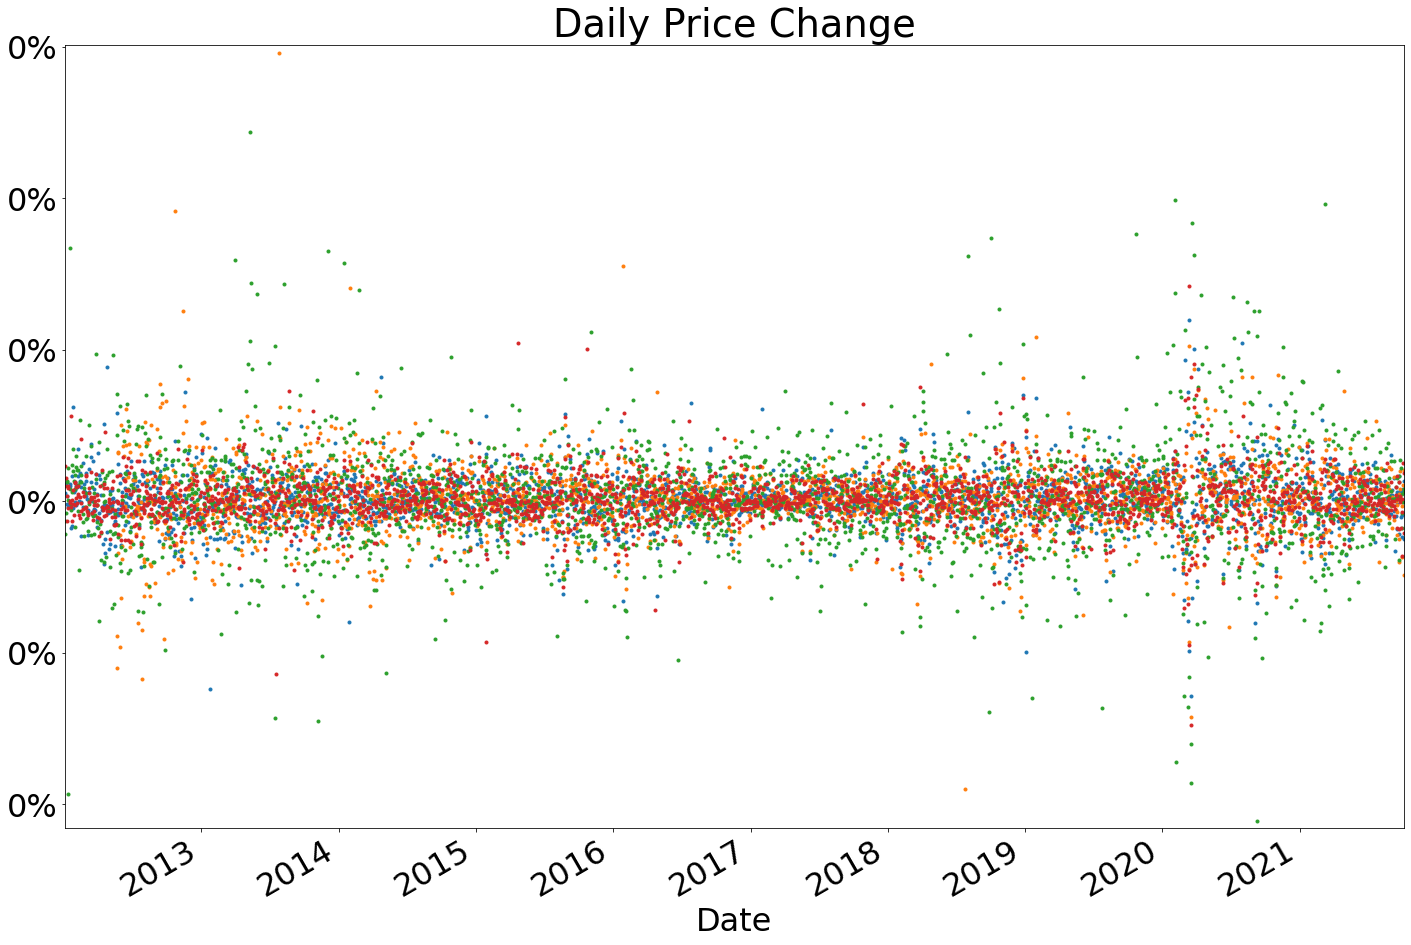

In [21]:
plt.rcParams.update({"font.size": 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].plot.line(ls = "", 
                                    marker = ".",
                                    ax = ax)
#y axis
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y)) + "%" for y in y_vals])   

plt.title("Daily Price Change")
plt.show()
plt.close()

In [22]:
stats_df = gather_statistics(price_change_data, 
                            sample = True)
stats_df

,AAPL,FB,TSLA,MSFT
mean,0.001,0.001,0.003,0.001
median,0.001,0.001,0.001,0.001
variance,0.000,0.001,0.001,0.000
SD,0.018,0.023,0.035,0.016
skewness,-0.120,0.939,0.432,0.045
kurtosis,9.420,21.486,9.245,13.699


<ipython-input-23-ddb0fc116f90>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])


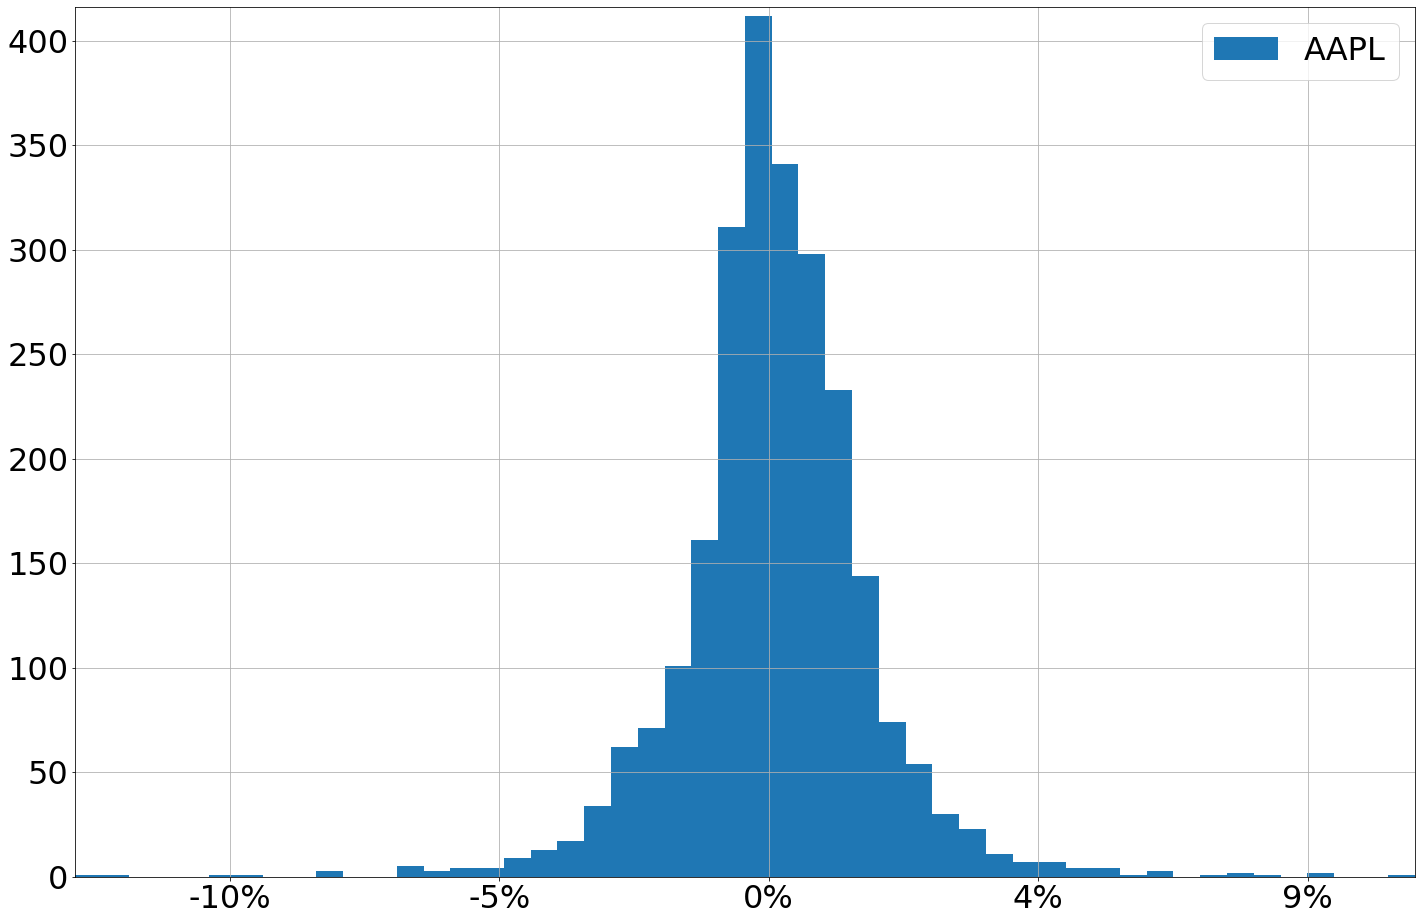

In [23]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["AAPL"].hist(bins = 50,
                             label = "AAPL")

#x axis
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])

plt.legend()
plt.show()

<ipython-input-24-1a03f20f4463>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])
<ipython-input-24-1a03f20f4463>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 1)) + "%" for y in y_vals])


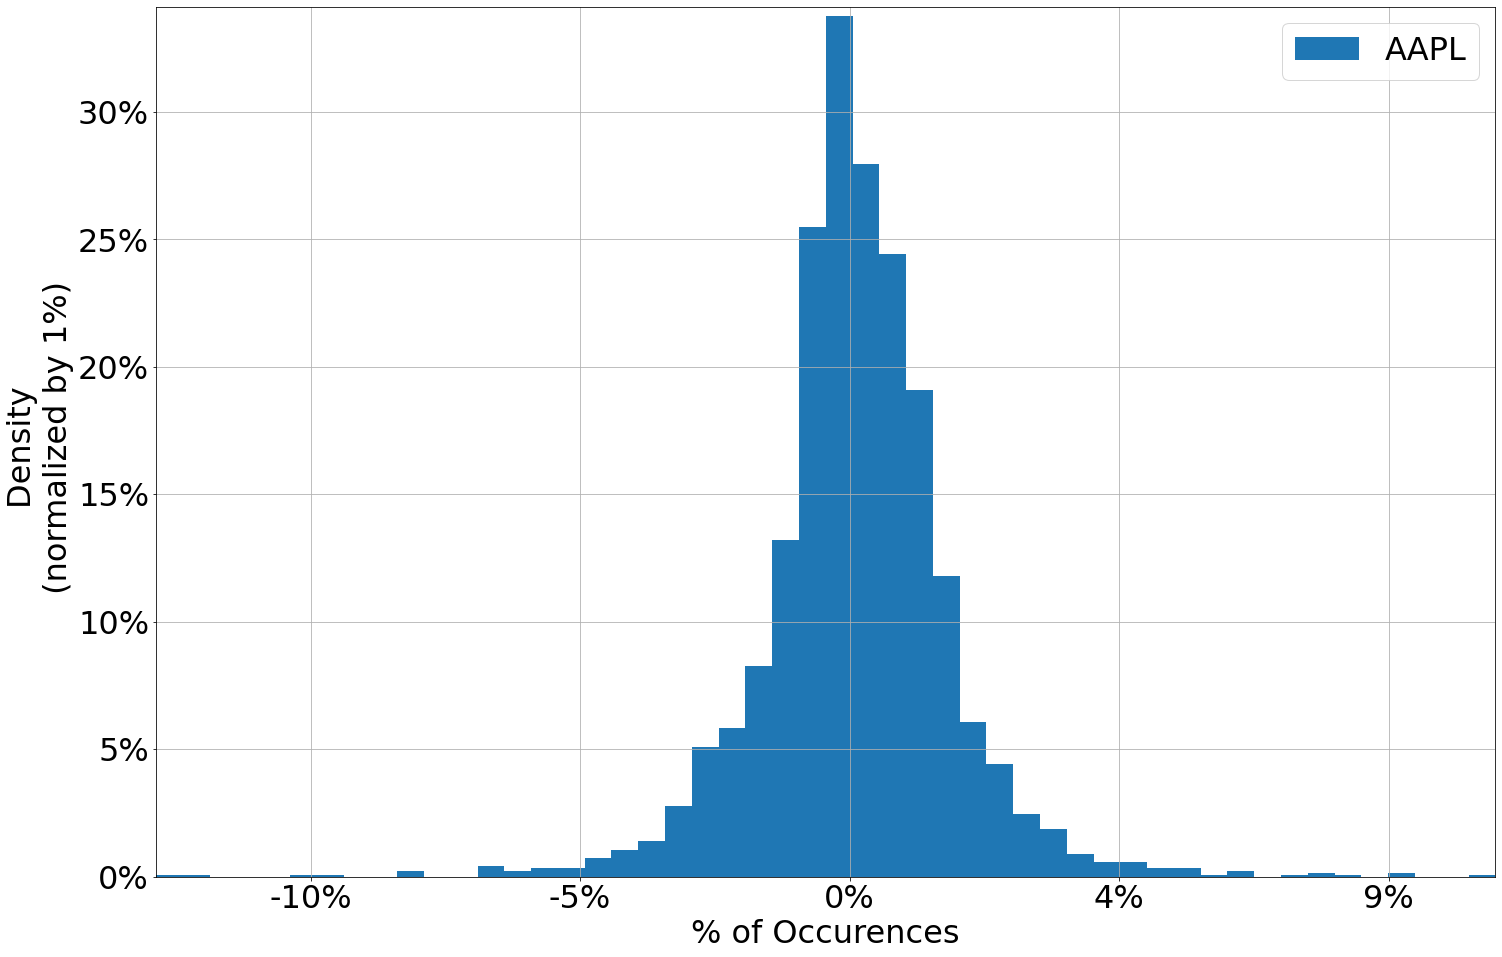

In [24]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["AAPL"].hist(bins = 50,
                             density = True,
                             label = "AAPL")

#x axis
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])
#y axis
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 1)) + "%" for y in y_vals])
#labels
ax.set_xlabel("% of Occurences")
ax.set_ylabel("Density \n (normalized by 1%)")

plt.legend()
plt.show()

### Create fig with 4 plots

array([<AxesSubplot:title={'center':'AAPL'}>,
       <AxesSubplot:title={'center':'FB'}>,
       <AxesSubplot:title={'center':'TSLA'}>,
       <AxesSubplot:title={'center':'MSFT'}>], dtype=object)

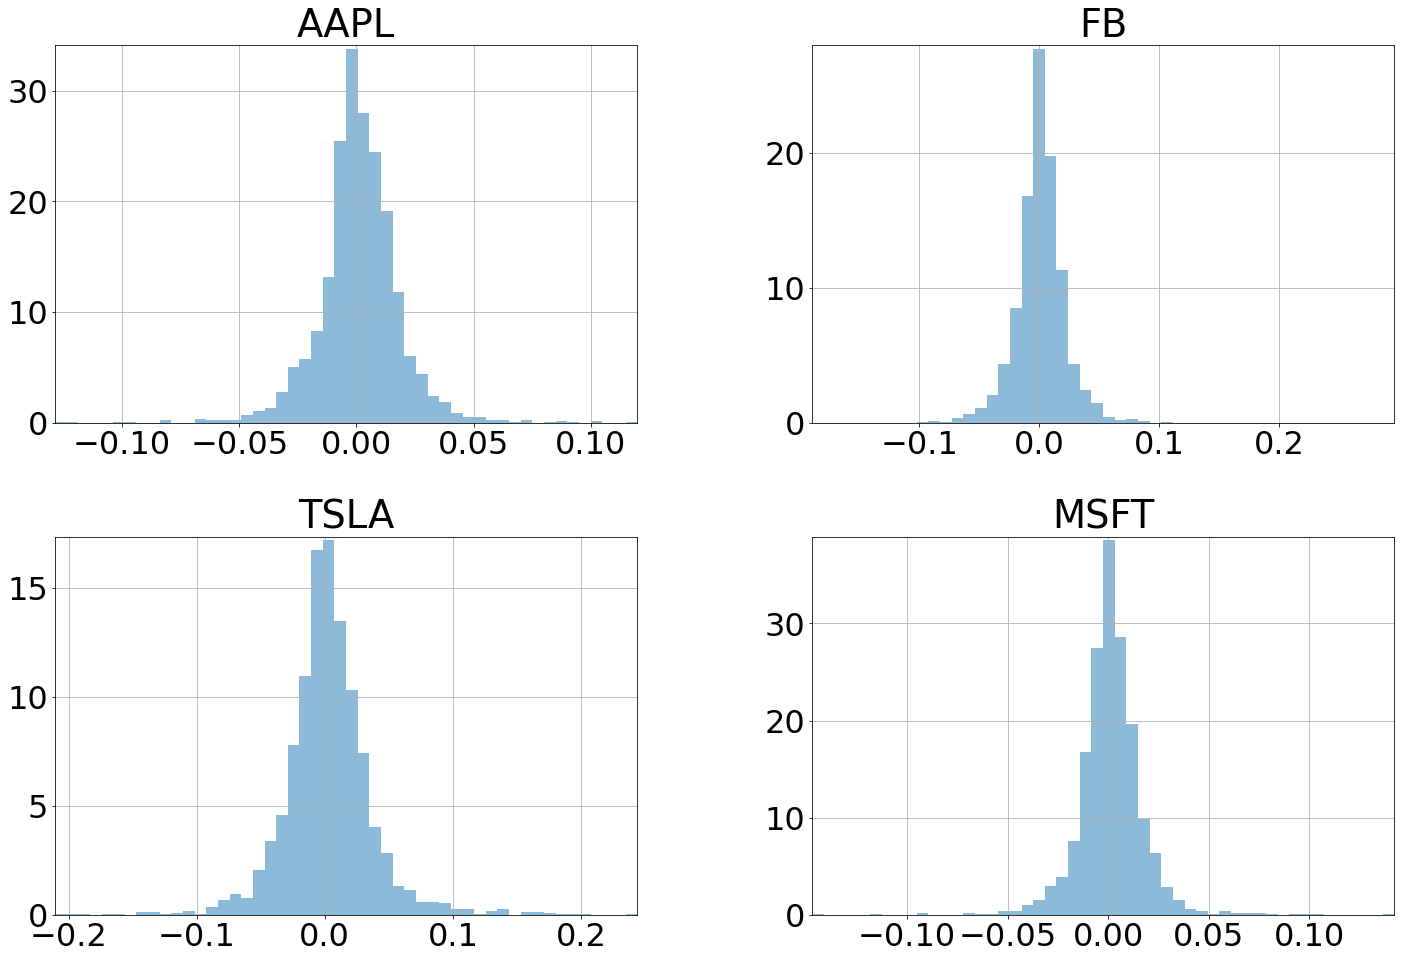

In [25]:
fig, ax = plt.subplots(2,2, figsize = (24, 16))
price_change_data.hist(bins = 50,
                      alpha = 0.5,
                      label = price_change_data.keys(),
                      density = True,
                      ax = ax)

<ipython-input-26-7e0a0f920c92>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])
<ipython-input-26-7e0a0f920c92>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y)) + "%" for y in y_vals])


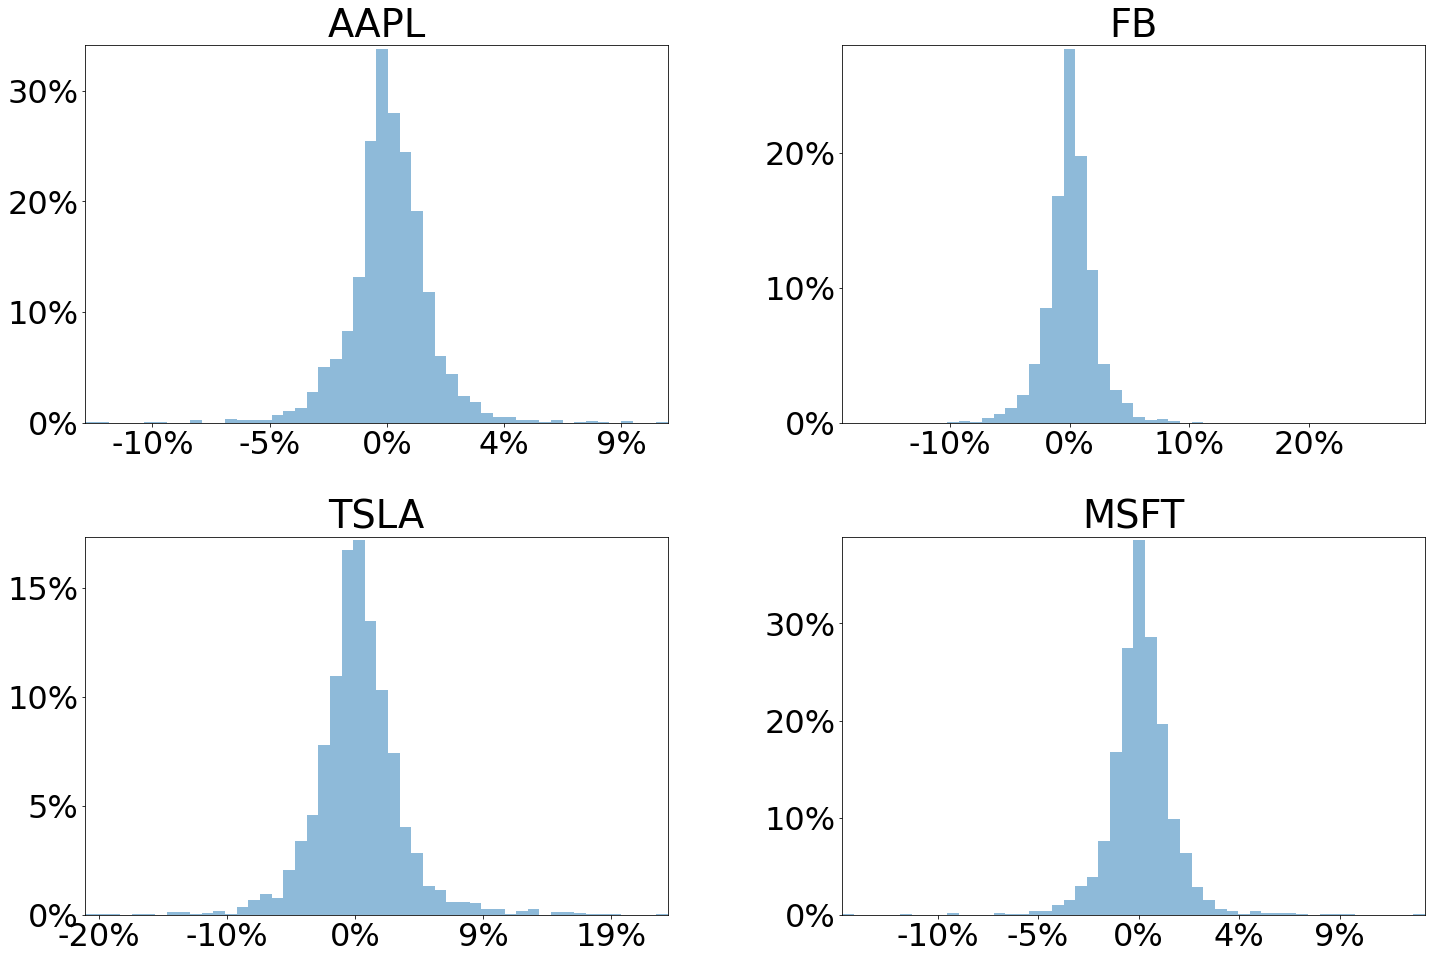

In [26]:
fig, ax = plt.subplots(2,2, figsize = (24, 16))
price_change_data.hist(bins = 50,
                      alpha = 0.5,
                      label = price_change_data.keys(),
                      density = True,
                      ax = ax)
#transform axis tick labels
for i in range(len(ax)):
    for j in range(len(ax[i])):
        a = ax[i][j]
        #stock = a.get_title()
        #a.set_title(stock)
        
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y)) + "%" for y in y_vals])
        a.grid(False)

<ipython-input-32-1c41d42747db>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])
<ipython-input-32-1c41d42747db>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y)) + "%" for y in y_vals])


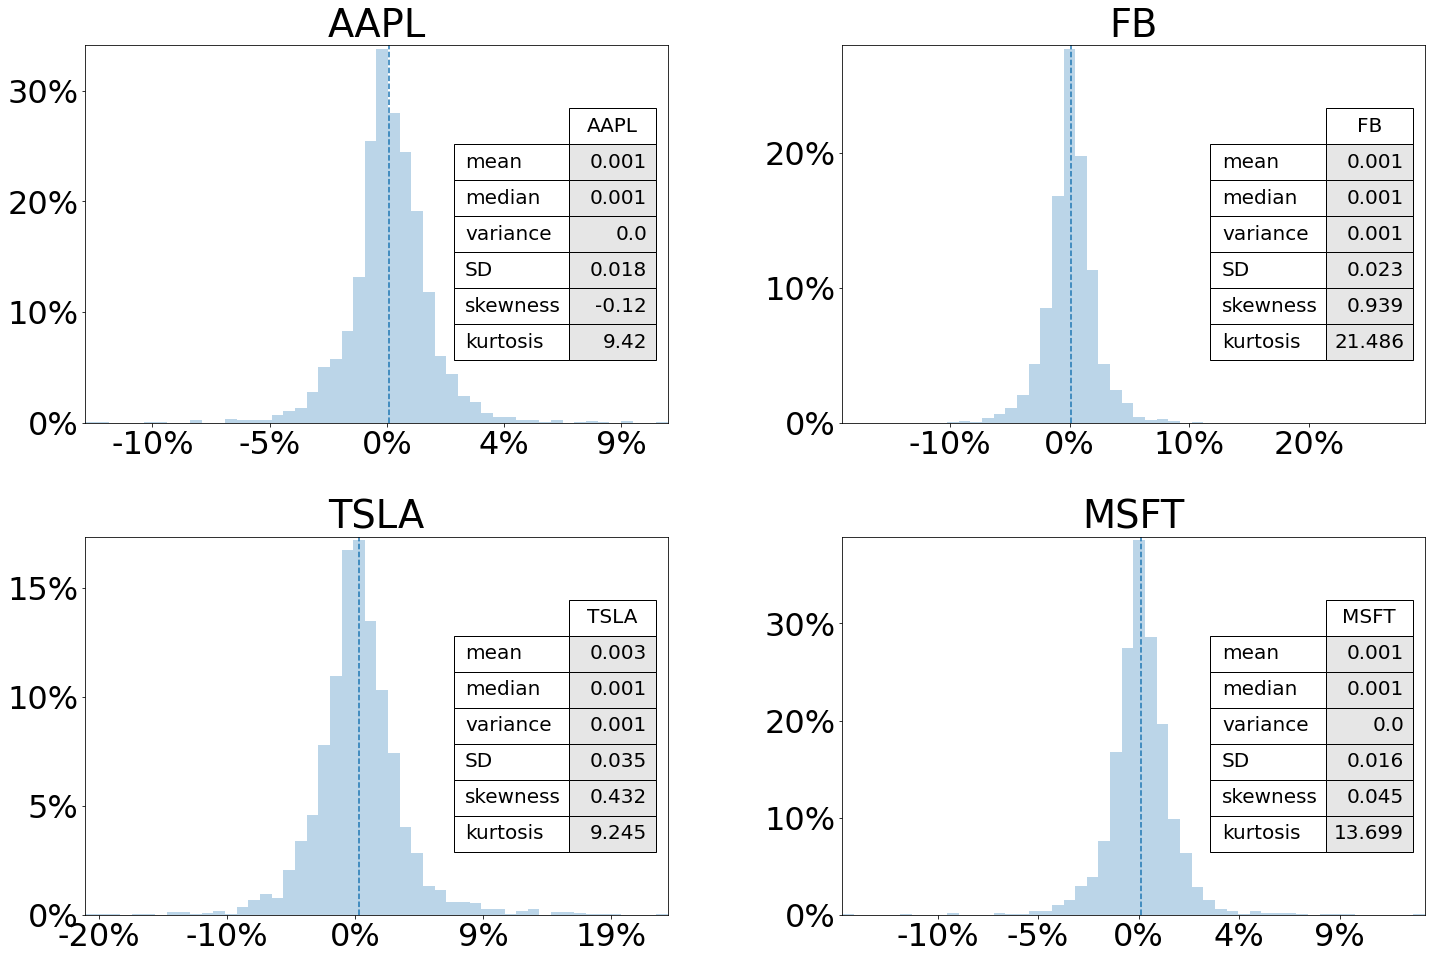

In [32]:
from pandas.plotting import table

fig, ax = plt.subplots(2,2, figsize = (24,16))
#for key in price_change_data:
price_change_data.hist(bins = 50, 
                       alpha = .3, 
                       label = price_change_data.keys(), 
                       ax = ax, 
                       density = True)

# plot table with summary statistics
for i in range(len(ax)):
    for j in range(len(ax[i])):
        # select hist plot for each stock
        a = ax[i][j]
        stock = a.get_title()
        
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y)) + "%" for y in y_vals])
        a.grid(False)
        
        
        hist_data = stats_df[stock] 
        stats = table(a, 
                      hist_data, 
                      colWidths=[.1], 
                      cellColours=[[(.9,.9,.9)]]*6, 
                      loc = "center right")
        stats.scale(1.5,3)
        stats.auto_set_font_size(False)
        stats.set_fontsize(20)
        a.axvline(x = hist_data.loc["mean"], ls="--")
        
plt.show()

<ipython-input-39-321a25ba2ff7>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])
<ipython-input-39-321a25ba2ff7>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y)) + "%" for y in y_vals])


AttributeError: 'AxesSubplot' object has no attribute 'gris'

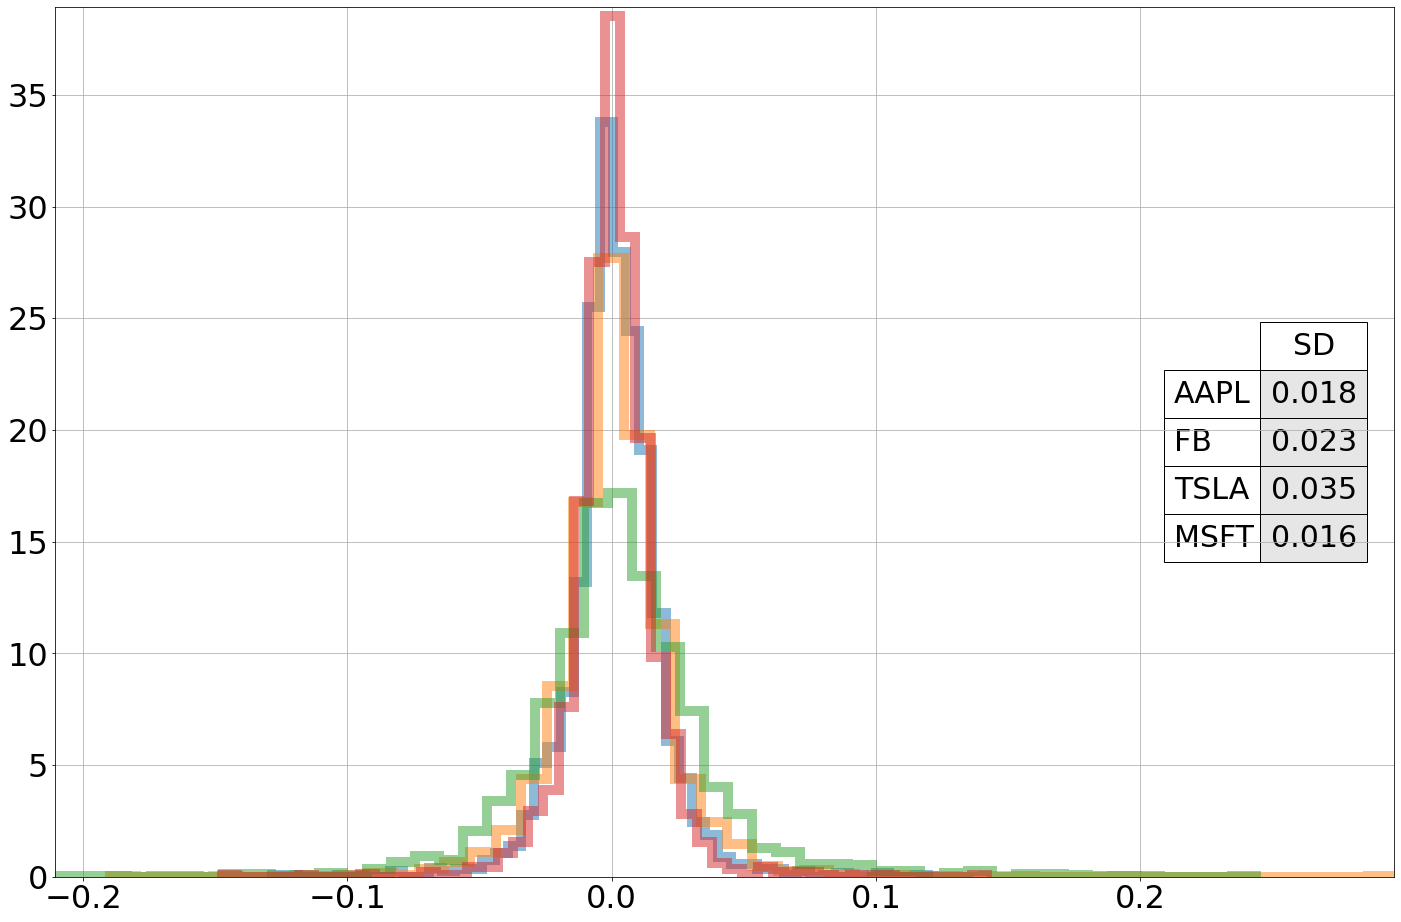

In [39]:
fig, ax = plt.subplots(figsize = (24, 16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, 
                                histtype = "step", 
                                alpha = .5, 
                                label = key, 
                                linewidth = 10, 
                                density = True)
    
x_vals = a.get_xticks()
a.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])
y_vals = a.get_yticks()
a.set_yticklabels([str(int(y)) + "%" for y in y_vals])

stats = table(ax, 
              stats_df.loc["SD"], 
              colWidths = [.1],
              cellColours = [[(.9,.9,.9)]]*4, 
              loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.gris(False)
    
plt.legend()

<ipython-input-38-204bc133c2cb>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])
<ipython-input-38-204bc133c2cb>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y)) + "%" for y in y_vals])


AttributeError: 'AxesSubplot' object has no attribute 'gris'

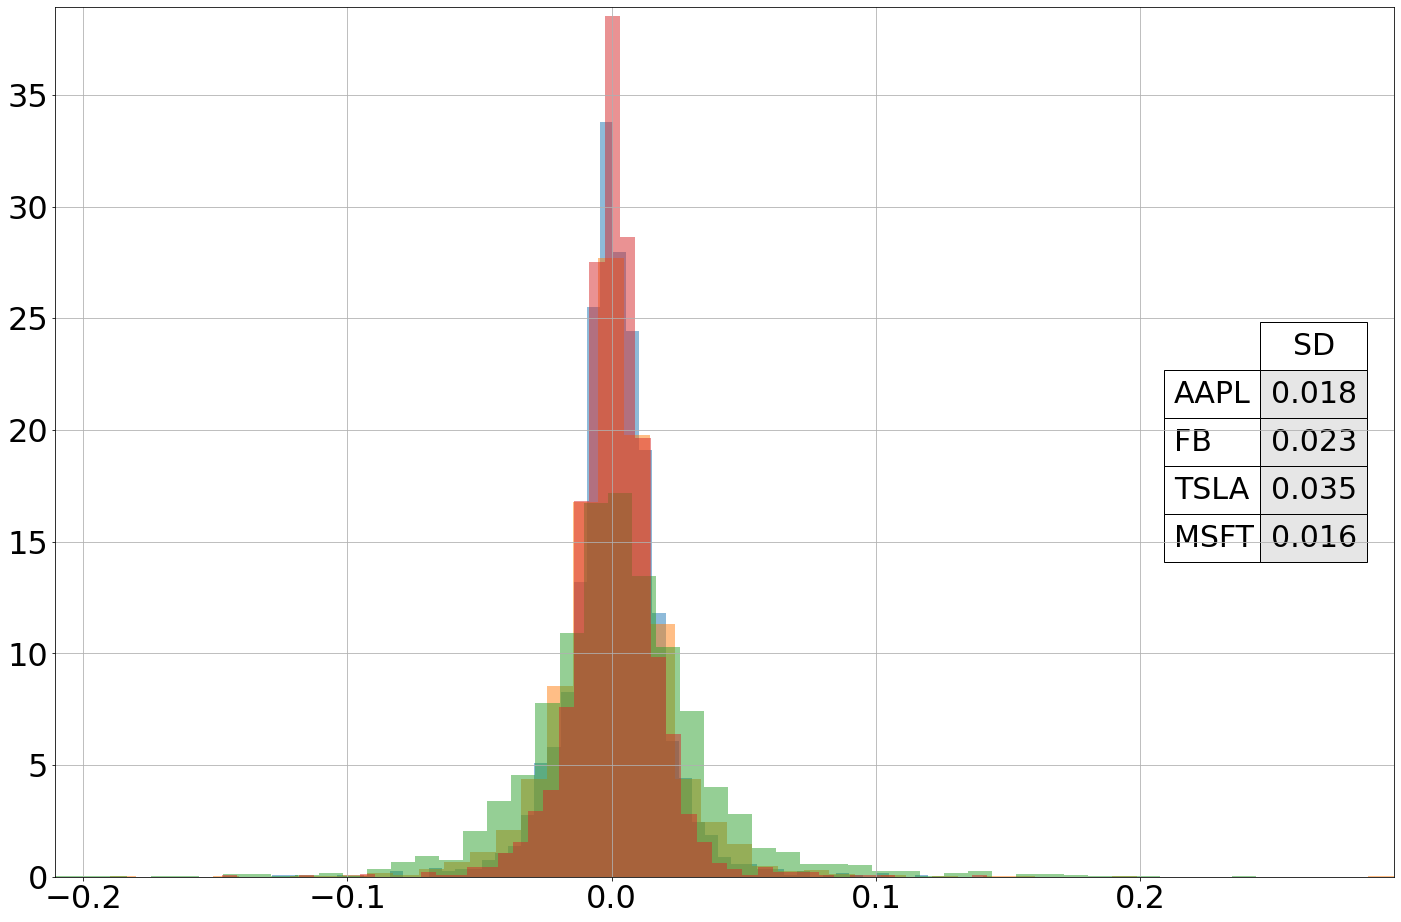

In [38]:
fig, ax = plt.subplots(figsize = (24, 16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, 
                                alpha = .5, 
                                label = key, 
                                linewidth = 10, 
                                density = True)

x_vals = a.get_xticks()
a.set_xticklabels([str(int(x*100)) + "%" for x in x_vals])
y_vals = a.get_yticks()
a.set_yticklabels([str(int(y)) + "%" for y in y_vals])

stats = table(ax, 
              stats_df.loc["SD"], 
              colWidths = [.1],
              cellColours = [[(.9,.9,.9)]]*4, 
              loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.gris(False)

plt.legend()